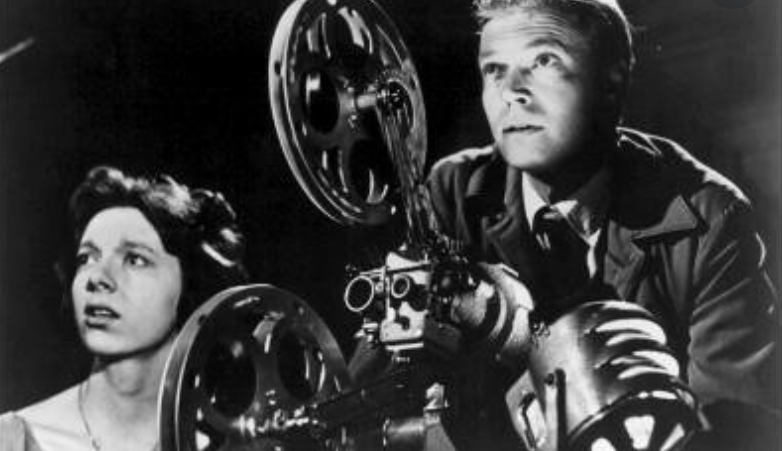

# Disclaimer! This kernel is only for educational purposes and made for fun therefor the content of the kernel should not be taken to seriously.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
# Load the model to get the vectors
nlp = spacy.load('en_core_web_lg')

wiki_movie_plots_deduped = pd.read_csv("../input/wikipedia-movie-plots/wiki_movie_plots_deduped.csv")
wiki_movie_plots_deduped.head()

In [ ]:
#we are only using plot and genre
features=['Plot','Genre']
df=wiki_movie_plots_deduped[features]
df.head()

In [ ]:
reviews = df[:100] # [:100] means we take 100 rows and 300 columns
# We just want the vectors so we can turn off other models in the pipeline
with nlp.disable_pipes():
    vectors = np.array([nlp(wiki_movie_plots_deduped.Plot).vector for idx, wiki_movie_plots_deduped in reviews.iterrows()])
    
vectors.shape

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectors, wiki_movie_plots_deduped['Genre'][:100], 
                                                    test_size=0.1, random_state=1)

# Create the LinearSVC model
model = LinearSVC(random_state=1, dual=False)
# Fit the model
model.fit(X_train,y_train)

# Uncomment and run to see model accuracy
print(f'Model test accuracy: {model.score(X_test, y_test)*100:.3f}%')


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
#from xgboost import XGBRegressor


model2 = RandomForestClassifier(n_estimators=150, max_depth=4, random_state=1)
model_0 = GradientBoostingClassifier(random_state=1)
model3 = DecisionTreeClassifier(max_depth=3, random_state=1)
#model=SGDClassifier(random_state=1)
#model=ExtraTreesClassifier(random_state=1)
#model = XGBRegressor()
# Define the models
model_1 = RandomForestClassifier(n_estimators=50, random_state=0)
model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
model_3 = RandomForestClassifier(n_estimators=200, min_samples_split=20, random_state=0)
model_4 = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=1)



model_0.fit(X_train,y_train)


print(f'Model test accuracy: {model_0.score(X_test, y_test)*100:.3f}%')

In [ ]:
model2.fit(X_train,y_train)
print(f'Model test accuracy: {model2.score(X_test, y_test)*100:.3f}%')
model3.fit(X_train,y_train)
print(f'Model test accuracy: {model3.score(X_test, y_test)*100:.3f}%')

In [ ]:
model_1.fit(X_train,y_train)
print(f'Model test accuracy: {model_1.score(X_test, y_test)*100:.3f}%')
model_2.fit(X_train,y_train)
print(f'Model test accuracy: {model_2.score(X_test, y_test)*100:.3f}%')
model_3.fit(X_train,y_train)
print(f'Model test accuracy: {model_3.score(X_test, y_test)*100:.3f}%')
model_4.fit(X_train,y_train)
print(f'Model test accuracy: {model_4.score(X_test, y_test)*100:.3f}%')

This is not the best way I think. It might be because a lack of preprocessing. If you have any tips it whould be nice. 